# 鸢尾花分类-KNN 

鸢尾花分类是典型的分类任务。 在本实验中，你将练习使用 kNN（k最近邻）算法来解决分类问题。 kNN 是一个简单而鲁棒的分类器，可用于不同的应用。

我们将使用 Iris 数据集来完成此作业。 该数据集最初由统计学家 R. Fisher 引入，由三种鸢尾花（山鸢尾、维吉尼亚鸢尾和杂色鸢尾）各 50 个观测值组成。 对于每个样本，给出 4 个特征：萼片长度和宽度，以及花瓣长度和宽度。

目标是训练 kNN 算法来区分物种。


该数据集可以从 UCI 机器学习存储库下载：https://archive.ics.uci.edu/ml/machine-learning-databases/iris/。
从数据文件夹下载 iris.data 文件。 包含所有列定义的数据集描述可以在数据集页面上找到 - https://archive.ics.uci.edu/ml/datasets/Iris。 或者，您可以使用 sklearn.datasets 导入数据。

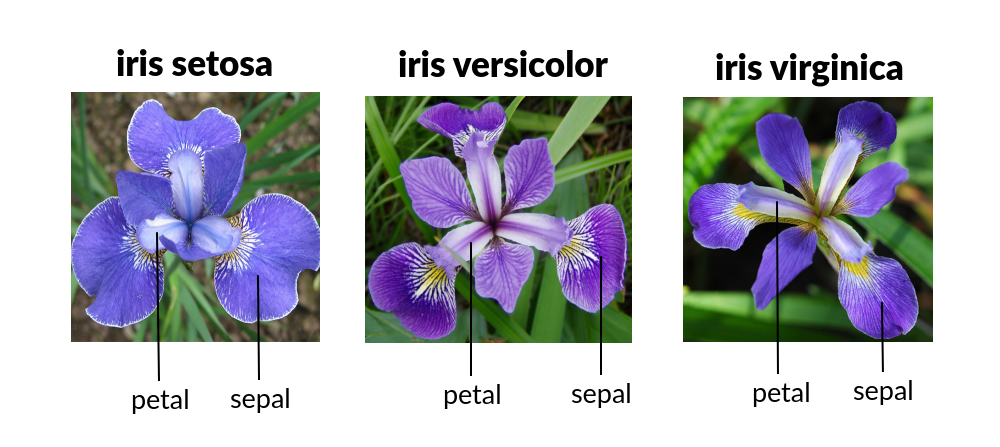

## 1调用SKlearn中的KNN模型

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets


###1：数据加载  

将文件 (iris.data) 中的数据加载到 DataFrame 中。 将DataFrame的列名设置为中文名，将数据集中的target数据加入DataFrame对象中的‘物种’列。

In [ ]:
# 请补充代码， 从sklearn加载iris数据集

iris_data = 
print(type(iris_data))

In [ ]:
print(iris_data.DESCR)

In [ ]:
# 请补充代码，打印数据的ndim,

# 请补充代码，打印数据的 shape, 

# 请补充代码，打印数据的  size 


In [ ]:
X=iris_data.data
Y=iris_data.target

In [ ]:

iris_df = pd.DataFrame(X, columns = ['花萼长度', '花萼宽度' , '花瓣长度' ,'花瓣宽度'])
iris_df['物种'] = Y

### 1 数据检查和清洗


显示数据集的前 5 行并使用任何可以帮助您理解数据的相关函数。


In [ ]:
iris_df.head()

In [ ]:
iris_df.isna().sum()

准备 2 个散点图 - sepal_width 与 sepal_length 和 petal_width 与 petal_length。 散点图应以不同的颜色显示每个类。

In [ ]:
# 花瓣宽度 和花瓣长度 及 种类的关系，以不同颜色标注不同类别的数据点


x = iris_df['花瓣宽度']
y= iris_df['花瓣长度']
cls = iris_df['物种']

plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'simsun'  # 设置字体
plt.plot(x[cls==0], y[cls==0], 'rs', label=iris_data.target_names[0])
plt.plot(x[cls==1], y[cls==1], 'bo', label=iris_data.target_names[1])
plt.plot(x[cls==2], y[cls==2], 'gx', label=iris_data.target_names[2])
plt.title('花瓣宽度与花瓣长度关系图')
plt.xlabel('花瓣宽度')
plt.ylabel('花瓣长度')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#散点图分析
# 花萼宽度 和花萼长度 及 种类的关系，以不同颜色标注不同类别的数据点
# 请 完成代码




### 2数据集划分

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


### 数据预处理
归一化

In [ ]:
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

### 3训练模型

In [ ]:

from sklearn.neighbors import  KNeighborsClassifier
#设置k为3
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)

In [ ]:
### 4.预测，输出正确率

In [ ]:

kNN.predict(X_test)
print ('Accuracy of kNN:',kNN.score(X_test,y_test))

In [ ]:
#￥## 5.针对新数据集进行预测

In [ ]:

#类别名称
myclass = ["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]

X_newtest = [[5.1,3.5,1.3,0.2],[6.2,3.4,5.3,2.2],[5.5,2.5,4.0,1.3]]
y_newtest = kNN.predict(X_newtest)

In [ ]:
#输出预测结果
print("my predict result:")
for i in range(len(X_newtest)):
    print(X_newtest[i],":",myclass[y_newtest[i]])

## 2从零开始实现KNN算法

In [ ]:
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # 记录下k个邻居
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])

        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [ ]:
## 定义 辅助函数

# 两者比较取大
def most_common(lst):
    return max(set(lst), key=lst.count)


# 欧氏距离
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))


### 模型训练

In [ ]:
knn = KNeighborsClassifier(k=3)
knn.fit(X_train, y_train)
accuracy = knn.evaluate(X_test, y_test)
accuracy

### 测试不同的k值对模型的影响， 画出随k值变化的损失函数变化图。 你能得出什么结论？

In [ ]:
# Test knn model across varying k
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

In [ ]:
# Visualize accuracy vs. k
plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'simsun'
plt.plot(ks, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title( "Performance of KNN")    
plt.show()       


### 评价模型

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [ ]:
knn.score(X_test,y_test)# 准确率

In [ ]:
# 微精确率均值 ，微平均是指计算多分类指标时赋予所有类别的每个样本相同的权重，将所有样本合在一起计算各个指标。  
precision_score(y_test, y_pred,labels=[0,1,2],average='micro') 

In [ ]:
#宏平均是指在计算均值时使每个类别具有相同的权重，最后结果是每个类别的指标的算术平均值。
precision_score(y_test, y_pred,labels=[0,1,2], average='macro')

In [ ]:
# 微观召回率均值
recall_score(y_test, y_pred, labels=[0,1,2],average='micro')

In [ ]:
# 宏召回率均值
#请补全代码